# Set your working directory

In [1]:
YOUR_FOLDER_DIRECTORY = '/Users/antoine/Documents/GitHub/Allocation_de_portefeuille_sous_contrainte_ESG'

# Packages

In [2]:
import numpy as np

# import Portfolio class
import sys
sys.path.append(YOUR_FOLDER_DIRECTORY)
from src.portfolio_class import Portfolio

# Define the portfolio

In [3]:
TICKERS = ['JPM', 'BP', 'AAPL','JNJ','MSFT','PG','V','HD','GE','PFE']
START_DATE = '2020-01-01'
END_DATE = '2023-12-01'
INTERVAL = '1mo' # '1d', '1y'
# Sustainalytics scores of the stocks (the smaller the better)
SUSTAINALYTICS_SCORES = [17.2, 34.6, 29.3, 24, 15, 29, 17, 13, 41, 25]

In [4]:
PORTFOLIO = Portfolio(TICKERS,
                      START_DATE,
                      END_DATE,
                      INTERVAL,
                      SUSTAINALYTICS_SCORES)

# Download the data

In [5]:
PORTFOLIO.download_data()

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  10 of 10 completed


# Plot optimal portfolio

## Optimal portfolio computation for a fixed maximum ESG score

In [10]:
# Maximum ESG score constraints
MAX_ESG_SCORE = 25
# propostion of risk-free asset in the portfolio
ALPHA = 0.9
# risk-free rate
RISK_FREE_RATE = 1
# Set gamma values
GAMMA_VALUES = np.linspace(-5, 5, 100)  # Inverse of the risk aversion parameter

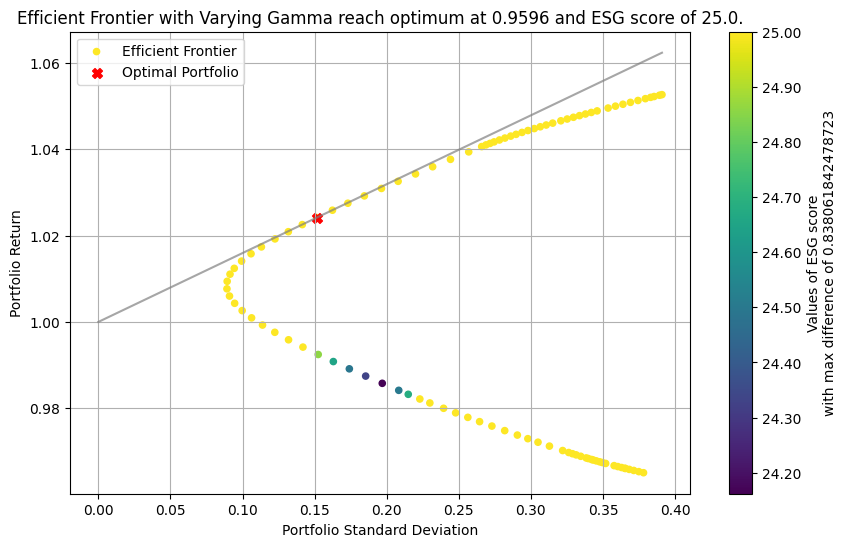

In [11]:
PORTFOLIO.plot_efficient_frontier(GAMMA_VALUES, 
                                  ALPHA,
                                  risk_free_rate=RISK_FREE_RATE,
                                  max_esg_score=MAX_ESG_SCORE,
                                  fully_invested=True,
                                  long_only=False)


## Optimal portfolios for varying maximum ESG scores

In [22]:
# Maximums ESG score constraints
MAX_ESG_SCORES = list(np.linspace(0, np.max(SUSTAINALYTICS_SCORES), 5))
# propostion of risk-free asset in the portfolio
ALPHA = 0.9
# risk-free rate
RISK_FREE_RATE = 1
# Set gamma values
GAMMA_VALUES = np.linspace(-5, 5, 100)  # Inverse of the risk aversion parameter


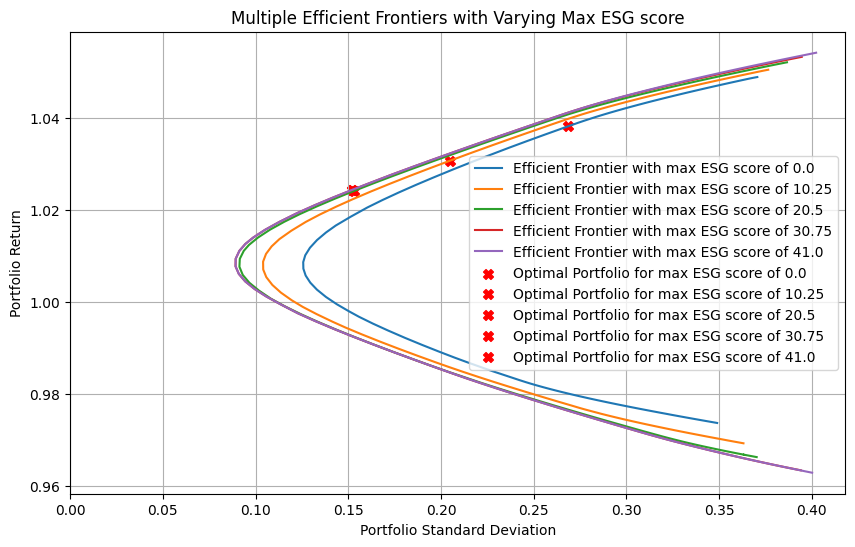

In [23]:
PORTFOLIO.plot_efficient_frontier_multiple_max_esg_scores(GAMMA_VALUES,
                                                            ALPHA,
                                                            risk_free_rate=RISK_FREE_RATE,
                                                            max_esg_scores=MAX_ESG_SCORES,
                                                            fully_invested=True,
                                                            long_only=False,
                                                            with_optimal_portfolio=True,
                                                            with_linear_tangent=False)

## Evolution of the sharp ratio of the tangent portfolio in function of the ESG score constraint

In [19]:
# Maximums ESG score constraints
MAX_ESG_SCORES = list(np.linspace(-np.max(SUSTAINALYTICS_SCORES), np.max(SUSTAINALYTICS_SCORES), 50))
# propostion of risk-free asset in the portfolio
ALPHA = 0.9
# risk-free rate
RISK_FREE_RATE = 1
# Set gamma values
GAMMA_VALUES = np.linspace(-5, 5, 100)  # Inverse of the risk aversion parameter


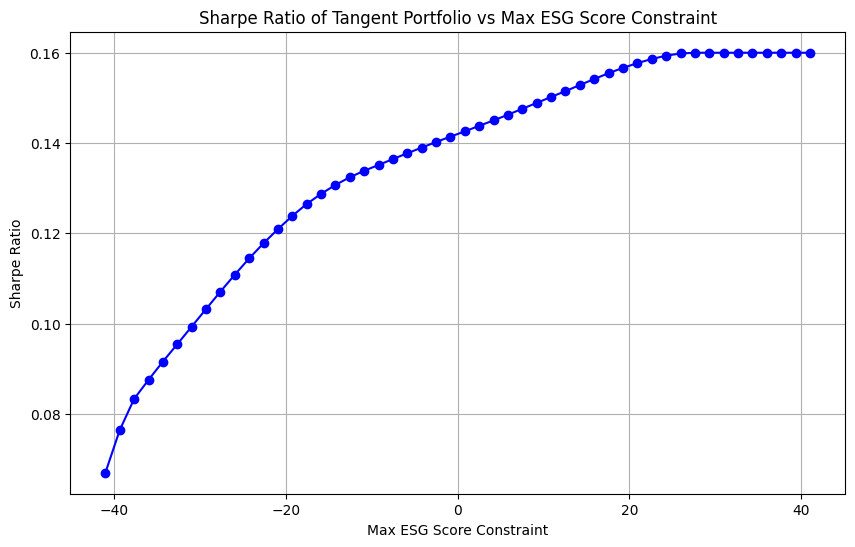

In [18]:
PORTFOLIO.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        ALPHA,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=False)